In [1]:
import numpy as np
import itertools

# num = number of ranks
# N = length of each rank
def generateMallowsSet(num, N, eta, centroid=0):
    if centroid == 0:
        centroid = np.arange(N)
    list = []
    for _ in range(num):
        ord = np.arange(N)
        ord[0] = centroid[0]
        for i in range(1, N):
            ord[i] = centroid[i]
            j = i
            while (eta > np.random.uniform(0.0,1.0) and j >= 1):
                ord[j], ord[j-1] = ord[j-1], ord[j]
                j -= 1

        list.append(ord)
    return list

In [2]:
data = generateMallowsSet(2,3,0.8)
data

[array([2, 1, 0]), array([1, 2, 0])]

In [3]:
def np_index(array, value):
    return np.where(array==value)[0][0]

In [4]:
def ktdistanceSOI(a, b):
    pairs = itertools.combinations(a, 2)
    count = 0.0
    for i, j in pairs:
        #print('-----',i, j)
        half = False
        first = np_index(a, i) - np_index(a, j)
        #print(first, np_index(a, i))
        try:
            secnd = np_index(b, i) - np_index(b, j)
        except:
            half = True
            count += 0.5
        if not half and (first * secnd < 0):
            count += 1
    return count

In [5]:
ktdistanceSOI(data[0],data[1])

1.0

In [83]:
r = 0.0
iters = 100
N = 12
central = np.arange(N)
kt = []
while r < 1.0:
    data = generateMallowsSet(iters, N, r)
    kt_sum = 0
    for d in data:
        kt_sum += ktdistanceSOI(central, d)
    kt.append((r, kt_sum/(iters*1.)))
    r += 0.01
print('done')

done


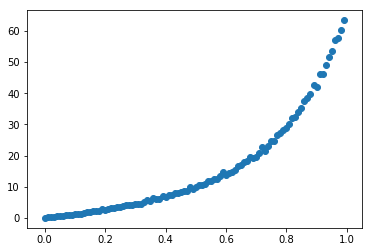

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
x,y = zip(*kt)
plt.scatter(x,y)

The higher numbers seem wrong? Should a ranking of 12 numbers really have a KT distance of 50+? The maximum number of swaps is (12 choose 2) = 66, so yes.

Let's try to fit an exponential function to it.

In [85]:
from scipy.optimize import curve_fit

In [86]:
xdata = np.asarray(x)
ydata = np.asarray(y)

def func(x, a, b, c):
    return a * np.exp(-b*x)+c

coeffs, _ = curve_fit(func, xdata, ydata)
coeffs

array([ 1.46524903, -3.7864722 , -0.38212237])

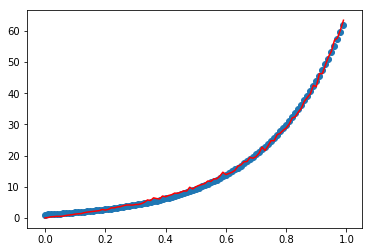

In [87]:
y = func(xdata, *coeffs)
plt.plot(xdata, ydata, 'r-')
plt.scatter(x,y)
plt.show()

This is a good fit. Incase I clear the output above, the fitted function is y = 1.542 * e^(-3.729 * x) -0.569. To solve for x given y, we can use x = ln(|(y + 0.569)/1.542|)/3.729

In [88]:
import math

a,b,c = [ 1.54231921, -3.72946466, -0.56943039]

def findEta(kt):
    return(math.log(abs((kt+c)/a)) / abs(b) )

findEta(10)

0.485503792052886